In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
from stop_words import get_stop_words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
lien = "https://news.google.com/topstories?hl=fr&gl=FR&ceid=FR%3Afr"

In [3]:
page_response = requests.get(lien)
soupe = bs(page_response.content, "html.parser")

In [4]:
blocs = soupe.find_all("article", {"jscontroller": "mhFxVb"})
len(blocs)

175

In [5]:
titres = []
compteur = 0
for bloc in blocs:
    compteur += 1
    titre = bloc.find("a", {"class": "DY5T1d"}).text
    titres.append(titre)
    
    auteur = bloc.find("a", {"class": "wEwyrc AVN2gc uQIVzc Sksgp"}).text
    
    temps = bloc.find("time")
    if temps:
        temps = temps["datetime"][:-1]
        temps = temps.replace("T", " ").split()
        date = temps[0]
        heure = temps[1]
    else:
        date = "--"
        heure = "--"
    
    texte = bloc.find("span", {"class": "xBbh9"})
    
    lien_article = bloc.find("a", {"class": "DY5T1d"})["href"][1:]
    lien_article = "https://news.google.com" + lien_article
    
    
    print("article n°", compteur)
    print(titre)
    print("Par", auteur)
    print("Publié le:", date, "à", heure)
    if texte:
        print("------------")
        print("Extrait :")
        print(texte.text)
    print("------------")
    print("Lien :")
    print(lien_article)
    print("================================================================================================")

article n° 1
Coronavirus : intermittents, aide aux séries annulées… les annonces de Macron pour la culture
Par Le Parisien
Publié le: 2020-05-06 à 12:08:00
------------
Extrait :
Le chef de l'Etat s'est entretenu ce mercredi matin avec des représentants de ce secteur en crise à cause de l'épidémie de Covid-19.
------------
Lien :
https://news.google.com/articles/CBMimQFodHRwOi8vd3d3LmxlcGFyaXNpZW4uZnIvY3VsdHVyZS1sb2lzaXJzL2Nvcm9uYXZpcnVzLWludGVybWl0dGVudHMtYWlkZS1hdXgtc2VyaWVzLWFubnVsZWVzLWxlcy1hbm5vbmNlcy1kZS1tYWNyb24tcG91ci1sYS1jdWx0dXJlLTA2LTA1LTIwMjAtODMxMTgzMC5waHDSAZ0BaHR0cDovL3d3dy5sZXBhcmlzaWVuLmZyL2FtcC9jdWx0dXJlLWxvaXNpcnMvY29yb25hdmlydXMtaW50ZXJtaXR0ZW50cy1haWRlLWF1eC1zZXJpZXMtYW5udWxlZXMtbGVzLWFubm9uY2VzLWRlLW1hY3Jvbi1wb3VyLWxhLWN1bHR1cmUtMDYtMDUtMjAyMC04MzExODMwLnBocA?hl=fr&gl=FR&ceid=FR%3Afr
article n° 2
Emmanuel Macron a dévoilé son plan très attendu pour la culture
Par CNEWS
Publié le: 2020-05-06 à 11:50:22
------------
Lien :
https://news.google.com/articles/CCAiC1BkbH

#### Problèmes :
- Limité et filtré par Google (non exhaustif)
- Comment récupérer les liens ??

In [6]:
def nettoyage(x):
    x = x.lower()
    x = re.sub(r"\W", " ", x) # Enleve la ponctuation
    x = re.sub(r"[éèêë]", "e", x)
    x = re.sub(r"[àâäà]", "a", x)
    x = re.sub(r"[ùûü]", "u", x)
    x = re.sub(r"[ôöò]", "o", x)
    x = re.sub(r"  +", " ", x)
    return x

In [7]:
titres_modif = list(map(nettoyage, titres))
titres_modif

['coronavirus intermittents aide aux series annulees les annonces de macron pour la culture',
 'emmanuel macron a devoile son plan tres attendu pour la culture',
 'direct confinement emmanuel macron souhaite prolonger jusqu a fin aout 2021 les droits a l assurance c ',
 'emmanuel macron au chevet du secteur de la culture sinistre',
 'culture emmanuel macron ebauche son plan pour aider le cinema et les series',
 'en direct ecoles transports masques le m deconfinement du gouvernement precise l apres 11 mai',
 'macron assure qu il ne contraindra pas les maires a rouvrir les ecoles le 11 mai',
 ' risque d ecroulement du pays macron se desolidarise de philippe dont il ne reprend pas les grands mots ',
 'deconfinement ce que vous pourrez faire cet ete et ce qui sera interdit',
 'emmanuel macron il est trop tot pour dire si on pourra avoir des vacances cet ete',
 'coronavirus jean castex agite le chiffon rouge du reconfinement',
 'le monsieur deconfinement du gouvernement prepare deja un plan

In [8]:
french_stop_words = get_stop_words('french')

In [9]:
titres_modif = " ".join(titres_modif)

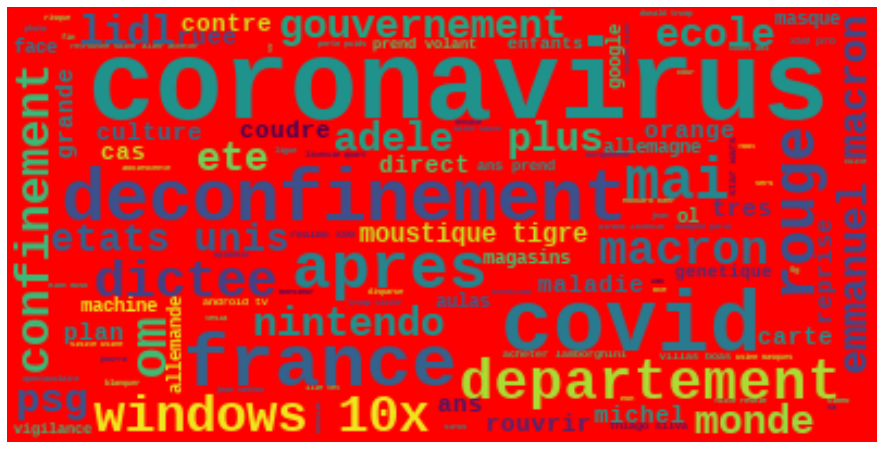

In [10]:
text = titres_modif

wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf",
                      stopwords=french_stop_words,
                      background_color="red",
                      min_word_length=0,
                      min_font_size=4)
wordcloud.generate(text)

plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()